<a href="https://colab.research.google.com/github/Tyoosp/MachineLearning/blob/main/1stWeekTask/ForexAUDUSDTimeSeries/Forex_AUD_USD_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('/content/AUDUSD1440.csv')

In [49]:
df.head(10)

,Time,Open,High,Low,Close,Volume
0,2008-09-18 00:00,0.80710,0.80930,0.79450,0.80460,40720
1,2008-09-19 00:00,0.80458,0.83604,0.80104,0.83357,87846
2,2008-09-21 00:00,0.83689,0.83728,0.82841,0.83092,4045
3,2008-09-22 00:00,0.83095,0.85190,0.82830,0.84440,92109
4,2008-09-23 00:00,0.84460,0.84680,0.82770,0.83465,95187
5,2008-09-24 00:00,0.83465,0.84250,0.83150,0.83470,79060
6,2008-09-25 00:00,0.83470,0.84250,0.83175,0.83675,79738
7,2008-09-26 00:00,0.83675,0.83768,0.82389,0.83081,77061
8,2008-09-28 00:00,0.82710,0.83285,0.82704,0.83260,2746
9,2008-09-29 00:00,0.83260,0.83270,0.79350,0.79890,87575


In [50]:
df.tail()

,Time,Open,High,Low,Close,Volume
5023,2024-10-11 00:00,0.67405,0.67588,0.67244,0.67485,54706
5024,2024-10-13 00:00,0.67354,0.67449,0.67229,0.67301,5676
5025,2024-10-14 00:00,0.67301,0.67446,0.67018,0.67245,67296
5026,2024-10-15 00:00,0.67248,0.67324,0.66730,0.66770,75766
5027,2024-10-16 00:00,0.66770,0.67005,0.66625,0.66677,54414


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5028 non-null   object 
 1   Open    5028 non-null   float64
 2   High    5028 non-null   float64
 3   Low     5028 non-null   float64
 4   Close   5028 non-null   float64
 5   Volume  5028 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 235.8+ KB


In [52]:
df.describe()

,Open,High,Low,Close,Volume
count,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000
mean,0.801062,0.804907,0.797244,0.801058,104997.358990
std,0.129572,0.129937,0.129140,0.129575,80501.737346
min,0.574270,0.582440,0.550680,0.574270,68.000000
25%,0.701200,0.704418,0.697777,0.701248,64796.250000
50%,0.757475,0.760610,0.754695,0.757445,97798.500000
75%,0.909575,0.914108,0.904693,0.909467,133279.500000
max,1.103040,1.107970,1.098230,1.103070,710352.000000


In [53]:
df.shape

(5028, 6)

In [54]:
df.isnull().sum()

,0
Time,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [55]:
df.duplicated().sum()

0

In [56]:
df['Time'].nunique()

5028

In [57]:
df['Open'].nunique()

4639

In [58]:
df['High'].nunique()

4648

In [59]:
df['Low'].nunique()

4637

In [60]:
df['Close'].nunique()

4616

In [61]:
df['Time'] = pd.to_datetime(df['Time'])

In [62]:
df.head()

,Time,Open,High,Low,Close,Volume
0,2008-09-18,0.80710,0.80930,0.79450,0.80460,40720
1,2008-09-19,0.80458,0.83604,0.80104,0.83357,87846
2,2008-09-21,0.83689,0.83728,0.82841,0.83092,4045
3,2008-09-22,0.83095,0.85190,0.82830,0.84440,92109
4,2008-09-23,0.84460,0.84680,0.82770,0.83465,95187


In [63]:
df = df.drop('Volume', axis=1)

In [64]:
df.head()

,Time,Open,High,Low,Close
0,2008-09-18,0.80710,0.80930,0.79450,0.80460
1,2008-09-19,0.80458,0.83604,0.80104,0.83357
2,2008-09-21,0.83689,0.83728,0.82841,0.83092
3,2008-09-22,0.83095,0.85190,0.82830,0.84440
4,2008-09-23,0.84460,0.84680,0.82770,0.83465


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    5028 non-null   datetime64[ns]
 1   Open    5028 non-null   float64       
 2   High    5028 non-null   float64       
 3   Low     5028 non-null   float64       
 4   Close   5028 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 196.5 KB


In [66]:
df.isnull().sum()

,0
Time,0
Open,0
High,0
Low,0
Close,0


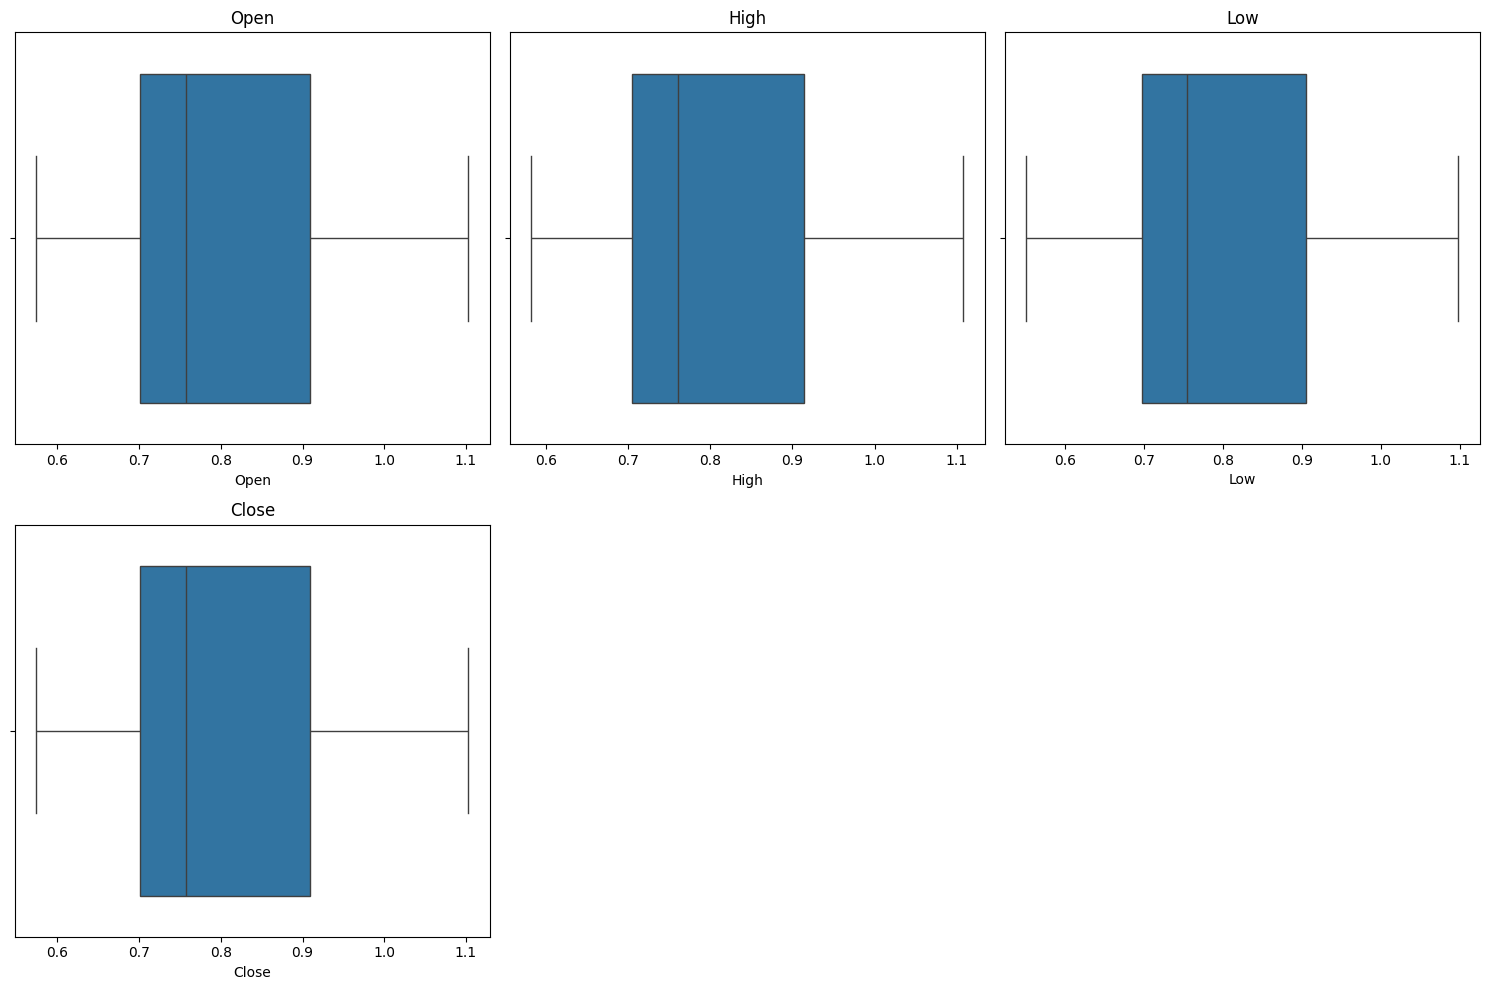

In [67]:
numerical_features = df.select_dtypes(include=np.number)

num_cols = numerical_features.shape[1]
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
  plt.subplot(num_rows, 3, i+1)
  sns.boxplot(x=df[col])
  plt.title(col)

plt.tight_layout()
plt.show()

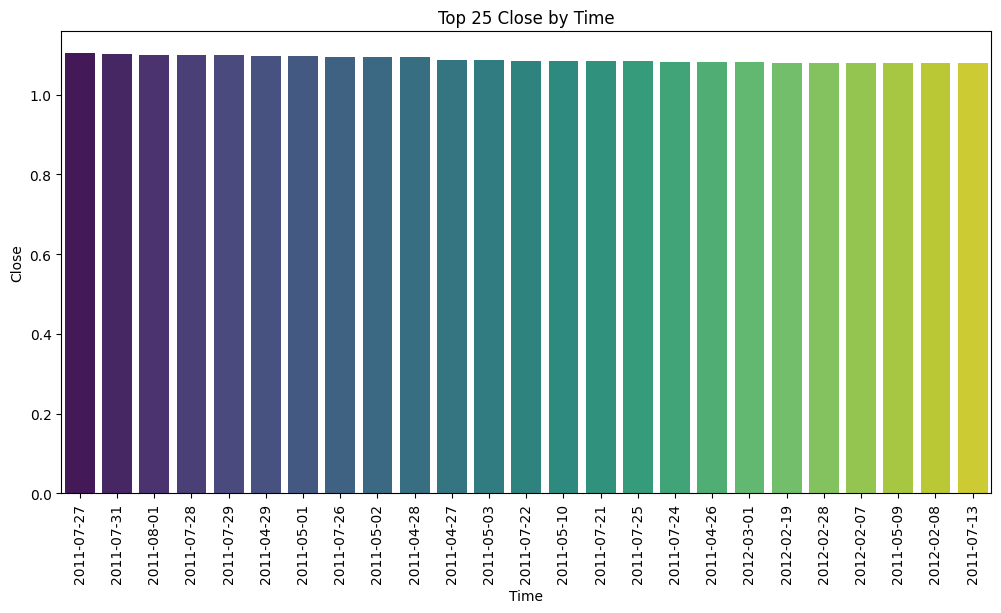

In [68]:
top_25_close = df.sort_values('Close', ascending=False).head(25)[['Time', 'Close']]

plt.figure(figsize=(12,6))
sns.barplot(x='Time', y='Close', data=top_25_close, palette='viridis')
plt.title('Top 25 Close by Time')
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Close')
plt.show()

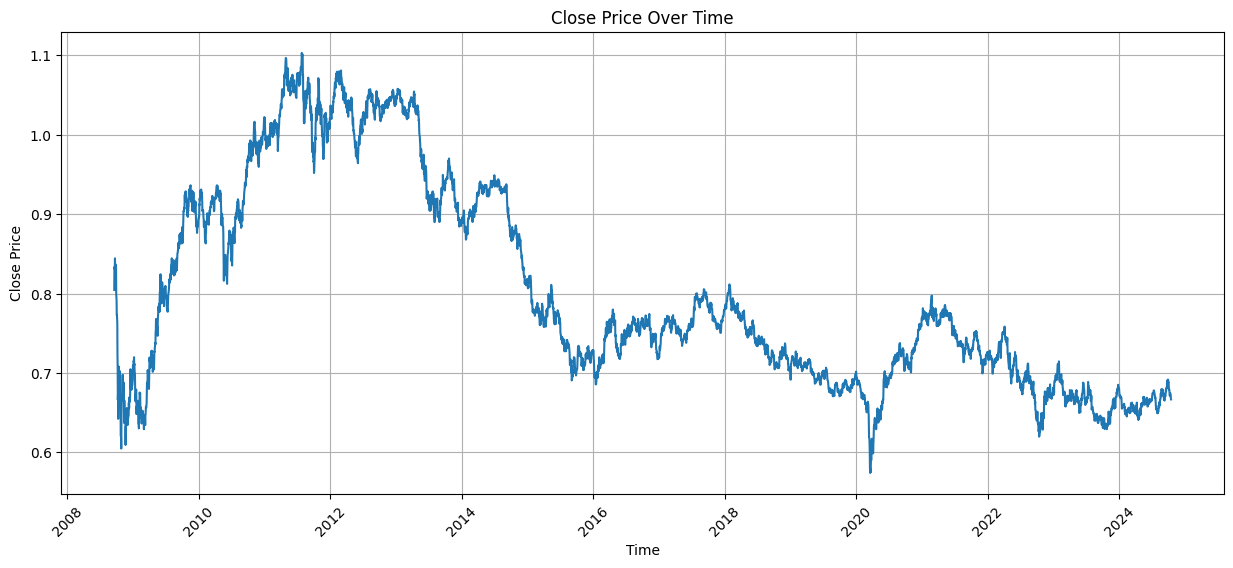

In [69]:

plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

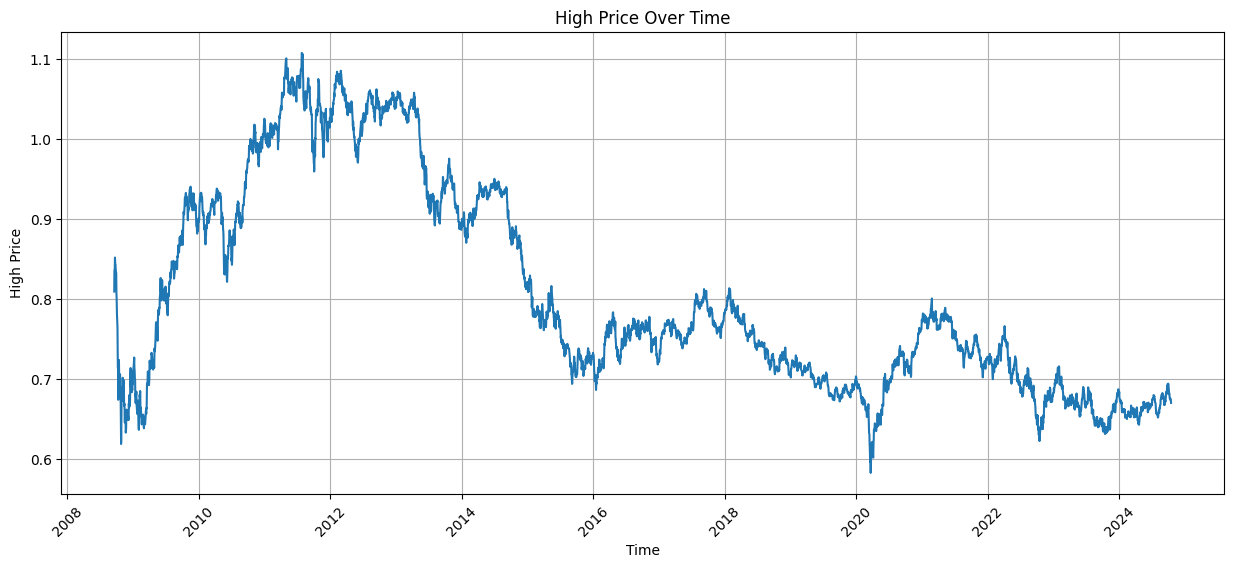

In [70]:
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['High'])
plt.title('High Price Over Time')
plt.xlabel('Time')
plt.ylabel('High Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

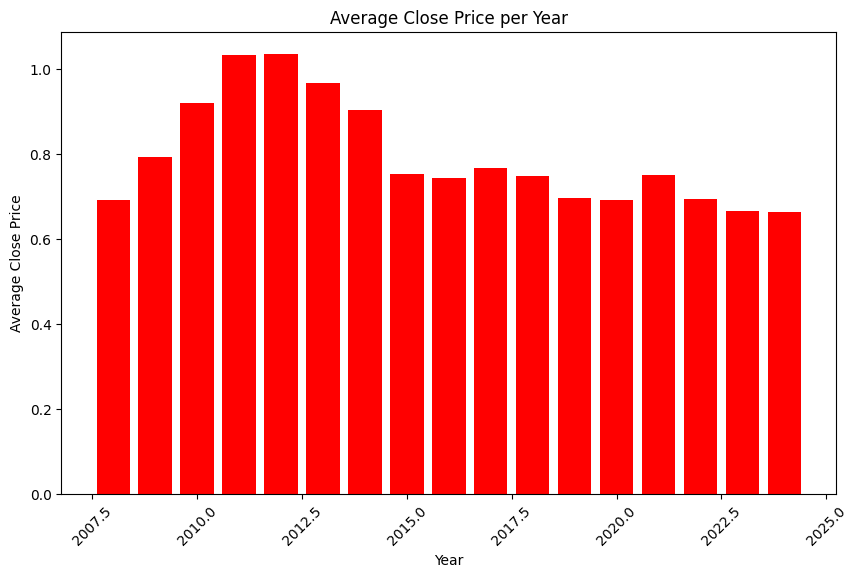

In [71]:

df['Year'] = df['Time'].dt.year

yearly_close = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10, 6))
plt.bar(yearly_close.index, yearly_close.values, color='red')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Average Close Price per Year')
plt.show()

<Figure size 1200x600 with 0 Axes>

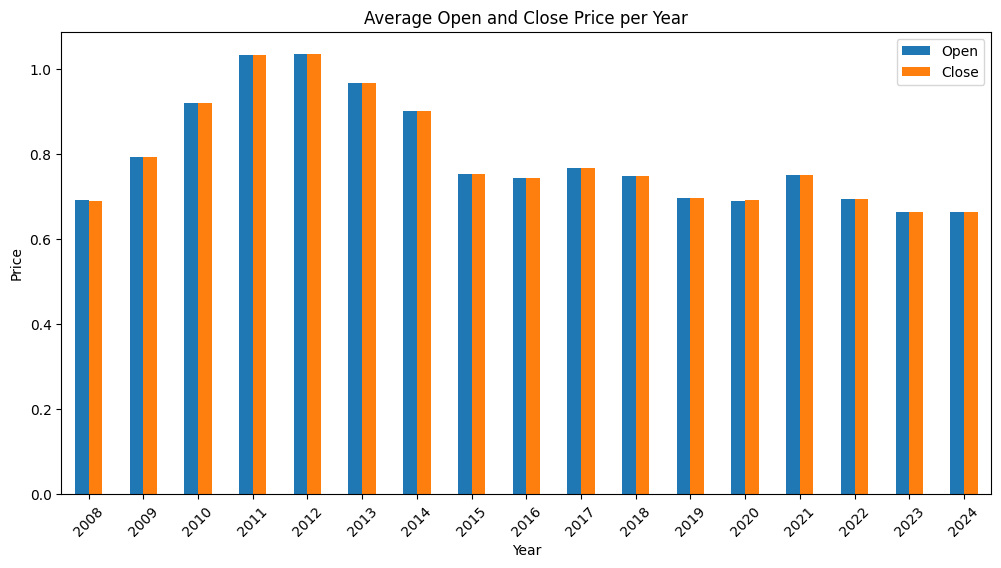

In [72]:

df['Year'] = df['Time'].dt.year

yearly_data = df.groupby('Year')[['Open', 'Close']].mean()

plt.figure(figsize=(12, 6))
yearly_data[['Open', 'Close']].plot(kind='bar', figsize=(12, 6))
plt.title('Average Open and Close Price per Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(['Open', 'Close'])
plt.show()

In [100]:


X = df[['Open', 'High', 'Low']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

new_data = pd.DataFrame({'Open': [1.5], 'High': [1.6], 'Low': [1.4]})
predicted_close = model.predict(new_data)
print(f"Predicted Close Price: {predicted_close[0]}")

Root Mean Squared Error: 0.002411599648948762
Predicted Close Price: 1.507514102075846


In [104]:

open_value = float(input('Masukkan nilai open: '))
high_value = float(input('Masukkan nilai high: '))
low_value = float(input('Masukkan nilai low: '))

new_data = pd.DataFrame({'Open': [open_value], 'High': [high_value], 'Low': [low_value]})
predicted_close = model.predict(new_data)
print('----------------------------------------------------------------------------')
print(f"Predicted Close Price: {predicted_close[0]}")
print('----------------------------------------------------------------------------')
print(f"Root Mean Squared Error: {rmse}")

Masukkan nilai open: 0.6679371940275568
Masukkan nilai high: 0.6701785948272083
Masukkan nilai low: 0.6663687289951367
----------------------------------------------------------------------------
Predicted Close Price: 0.6682946799741677
----------------------------------------------------------------------------
Root Mean Squared Error: 0.002411599648948762


In [94]:
X = df[['Close']]
y = df['Close'].shift(-1)

X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

last_close = df['Close'].iloc[-1]
new_data = pd.DataFrame({'Close': [last_close]})
predicted_close = model.predict(new_data)
print(f"Predicted Close Price for the next day: {predicted_close[0]}")

Root Mean Squared Error: 0.005708286232148739
Predicted Close Price for the next day: 0.6668374283386113


In [95]:
X = df[['High']]
y = df['High'].shift(-1)

X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

last_close = df['High'].iloc[-1]
new_data = pd.DataFrame({'High': [last_close]})
predicted_close = model.predict(new_data)
print(f"Predicted High Price for the next day: {predicted_close[0]}")

Root Mean Squared Error: 0.005004604030944834
Predicted High Price for the next day: 0.6701785948272083


In [96]:
X = df[['Low']]
y = df['Low'].shift(-1)

X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

last_close = df['Low'].iloc[-1]
new_data = pd.DataFrame({'Low': [last_close]})
predicted_close = model.predict(new_data)
print(f"Predicted Low Price for the next day: {predicted_close[0]}")

Root Mean Squared Error: 0.0055586632587185675
Predicted Low Price for the next day: 0.6663687289951367


In [97]:
X = df[['Open']]
y = df['Open'].shift(-1)

X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

last_Open = df['Open'].iloc[-1]
new_data = pd.DataFrame({'Open': [last_Open]})
predicted_Open = model.predict(new_data)
print(f"Predicted Open Price for the next day: {predicted_Open[0]}")

Root Mean Squared Error: 0.005591241566956524
Predicted Open Price for the next day: 0.6679371940275568
